# ***網路爬蟲對於中央氣象局金門測站之資料抓取及分析(2020年10月份資料)***


使用工具: google Colab

#函式庫import

In [ ]:
# import
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import sqlite3 

# html抓取及轉換成資料

In [ ]:
#Crawler
url= 'https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=467110&stname=%25E9%2587%2591%25E9%2596%2580&datepicker=2020-10'
#新竹的 url='https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=C0D660&stname=%25E6%2596%25B0%25E7%25AB%25B9%25E5%25B8%2582%25E6%259D%25B1%25E5%258D%2580&datepicker=2020-10' #link
htmlfile=requests.get(url)
objSoup=BeautifulSoup(htmlfile.text,'lxml')
htmldatas=objSoup.select('#MyTable')

for htmldata in htmldatas:
  datas=list(htmldata.stripped_strings)         #result
  print(datas)

['press', 'temperature', 'Dew Point', 'RH', 'WS/WD', 'Precp', 'SunShine', 'visibility', 'Evaperation', 'UVI', 'Cloud', '觀測時間', '(day)', '測站氣壓', '(hPa)', '海平面氣壓', '(hPa)', '測站最高氣壓', '(hPa)', '測站最高氣壓時間', '(LST)', '測站最低氣壓', '(hPa)', '測站最低氣壓時間', '(LST)', '氣溫', '(℃)', '最高氣溫', '(℃)', '最高氣溫時間', '(LST)', '最低氣溫', '(℃)', '最低氣溫時間', '(LST)', '露點溫度', '(℃)', '相對溼度', '(%)', '最小相對溼度', '(%)', '最小相對溼度時間', '(LST)', '風速', '(m/s)', '風向', '(360degree)', '最大陣風', '(m/s)', '最大陣風風向', '(360degree)', '最大陣風風速時間', '(LST)', '降水量', '(mm)', '降水時數', '(hour)', '最大十分鐘降水量', '(mm)', '最大十分鐘降水量起始時間', '(LST)', '最大六十分鐘降水量', '(mm)', '最大六十分鐘降水量起始時間', '(LST)', '日照時數', '(hour)', '日照率', '(%)', '全天空日射量', '(MJ/㎡)', '能見度', '(km)', 'A型蒸發量', '(mm)', '日最高紫外線指數', '日最高紫外線指數時間', '(LST)', '總雲量', '(0~10)', 'ObsTime', 'StnPres', 'SeaPres', 'StnPresMax', 'StnPresMaxTime', 'StnPresMin', 'StnPresMinTime', 'Temperature', 'T Max', 'T Max Time', 'T Min', 'T Min Time', 'Td dew point', 'RH', 'RHMin', 'RHMinTime', 'WS', 'WD', 'WSGust', 'WDGust', 'WGust

# 列一

In [ ]:
titles =objSoup.select('.first_tr')
for title in titles:
  column1=list(title.stripped_strings) #reult
  print(column1)
print(len(column1))

['press', 'temperature', 'Dew Point', 'RH', 'WS/WD', 'Precp', 'SunShine', 'visibility', 'Evaperation', 'UVI', 'Cloud']
11


# 列二

In [ ]:
title2s =objSoup.select('.second_tr')
for title2 in title2s:
  column2=list(title2.stripped_strings) #result
print(column2)
print(len(column2))

['觀測時間', '(day)', '測站氣壓', '(hPa)', '海平面氣壓', '(hPa)', '測站最高氣壓', '(hPa)', '測站最高氣壓時間', '(LST)', '測站最低氣壓', '(hPa)', '測站最低氣壓時間', '(LST)', '氣溫', '(℃)', '最高氣溫', '(℃)', '最高氣溫時間', '(LST)', '最低氣溫', '(℃)', '最低氣溫時間', '(LST)', '露點溫度', '(℃)', '相對溼度', '(%)', '最小相對溼度', '(%)', '最小相對溼度時間', '(LST)', '風速', '(m/s)', '風向', '(360degree)', '最大陣風', '(m/s)', '最大陣風風向', '(360degree)', '最大陣風風速時間', '(LST)', '降水量', '(mm)', '降水時數', '(hour)', '最大十分鐘降水量', '(mm)', '最大十分鐘降水量起始時間', '(LST)', '最大六十分鐘降水量', '(mm)', '最大六十分鐘降水量起始時間', '(LST)', '日照時數', '(hour)', '日照率', '(%)', '全天空日射量', '(MJ/㎡)', '能見度', '(km)', 'A型蒸發量', '(mm)', '日最高紫外線指數', '日最高紫外線指數時間', '(LST)', '總雲量', '(0~10)']
69


# 建字典(分類說明)

In [ ]:
dict1={column1[0]:{column2[1],column2[2],column2[3],column2[4],column2[5],column2[6],},
    column1[1]:{column2[7],column2[8],column2[9],column2[10],column2[11]},
    column1[2]:column2[12],
    column1[3]:{column2[13],column2[14],column2[15]},
    column1[4]:{column2[16],column2[17],column2[18],column2[19],column2[20]},
    column1[5]:{column2[21],column2[22],column2[23],column2[24],column2[25],column2[26]},
    column1[6]:{column2[27],column2[28],column2[29]},
    column1[7]:column2[30],
    column1[8]:column2[31],
    column1[9]:{column2[32],column2[33]},
    column1[10]:column2[34]}
dict2=[dict1]
dict_df = pd.DataFrame(dict2).T
 
print(dict_df)

                                               0
press        {測站最高氣壓, 海平面氣壓, 測站氣壓, (day), (hPa)}
temperature     {測站最低氣壓, (LST), 測站最高氣壓時間, (hPa)}
Dew Point                               測站最低氣壓時間
RH                              {氣溫, (LST), (℃)}
WS/WD           {(LST), 最高氣溫, 最低氣溫, 最高氣溫時間, (℃)}
Precp           {相對溼度, 露點溫度, (LST), 最低氣溫時間, (℃)}
SunShine                           {最小相對溼度, (%)}
visibility                              最小相對溼度時間
Evaperation                                (LST)
UVI                                  {風速, (m/s)}
Cloud                                         風向


#純資料

In [ ]:
for i in range(115):
  datas.pop(0)
print(datas)
print(len(datas))
print(datas[0])

['01', '1008.4', '1012.6', '1010.1', '2020-10-01 21:51', '1006.6', '2020-10-01 16:37', '25.9', '31.9', '2020-10-01 13:33', '23.2', '2020-10-01 02:19', '17.5', '60', '44', '2020-10-01 13:16', '4.2', '40', '12.8', '10', '2020-10-01 11:03', '0.0', '0.0', '0.0', '...', '0.0', '...', '7.8', '65.9', '16.94', '20.0', '4.6', '8', '2020-10-01 12:00', '5.2', '02', '1009.4', '1013.6', '1010.9', '2020-10-02 09:24', '1007.3', '2020-10-02 14:55', '26.4', '33.2', '2020-10-02 13:18', '22.7', '2020-10-02 05:53', '18.5', '63', '43', '2020-10-02 13:18', '3.5', '40', '12.3', '90', '2020-10-02 14:10', '0.0', '0.0', '0.0', '...', '0.0', '...', '10.5', '89.0', '19.12', '21.7', '5.6', '9', '2020-10-02 12:00', '1.7', '03', '1009.2', '1013.4', '1010.9', '2020-10-03 08:47', '1006.7', '2020-10-03 14:32', '26.8', '32.9', '2020-10-03 11:49', '22.0', '2020-10-03 04:41', '20.0', '67', '48', '2020-10-03 11:08', '2.5', '30', '9.1', '100', '2020-10-03 14:16', '0.0', '0.0', '0.0', '...', '0.0', '...', '9.8', '83.2', '18.

In [ ]:
ObsTime=[]#0
StnPres=[]  #1
SeaPres=[]  #2
StnPresMax=[] #3
StnPresMaxTime=[] #4
StnPresMin=[] #5
StnPresMinTime=[] #6
Temperature=[]  #7
TMax=[] #8
TMaxTime=[]#9
TMin=[]#10
TMinTime=[]#11
Tddewpoint=[]#12
RH=[]#13
RHMin=[]#14
RHMinTime=[]#15
WS=[]#16
WD=[]#17
WSGust=[]#18
WDGust=[]#19
WGustTime=[]#20
Precp=[]#21
PrecpHour=[]#22
PrecpMax10=[]#23
PrecpMax10Time=[]#24
PrecpMax60=[]#25
PrecpMax60Time=[]#26
SunShine=[]#27
SunShineRate=[]#28
GloblRad=[]#29
VisbMean=[]#30
EvapA=[]#31
UVIMax=[]#32
UVIMaxTime=[]#33
CloudAmount=[]#34

#將資料做分類


In [ ]:
for i in range(0,1085,1):
  if i % 35 ==0:
    ObsTime.append(int(datas[i])) 
  elif i % 35 ==1:
    StnPres.append(float(datas[i]))
  elif i % 35 ==2:
    SeaPres.append(float(datas[i]))
  elif i % 35 ==3:
    StnPresMax.append(float(datas[i]))
  elif i % 35 ==4:
    StnPresMaxTime.append(datas[i])
  elif i % 35 ==5:
    StnPresMin.append(float(datas[i]))
  elif i % 35 ==6:
    StnPresMinTime.append(datas[i])
  elif i % 35 ==7:
    Temperature.append(float(datas[i]))
  elif i % 35 ==8:
    TMax.append(float(datas[i]))
  elif i % 35 ==9:
    TMaxTime.append(datas[i])
  elif i % 35 ==10:
    TMin.append(float(datas[i]))
  elif i % 35 ==11:
    TMinTime.append(datas[i])
  elif i % 35 ==12:
    Tddewpoint.append(float(datas[i]))
  elif i % 35 ==13:
    RH.append(float(datas[i]))
  elif i % 35 ==14:
    RHMin.append(float(datas[i]))
  elif i % 35 ==15:
    RHMinTime.append(datas[i])
  elif i % 35 ==16:
    WS.append(float(datas[i]))
  elif i % 35 ==17:
    WD.append(float(datas[i]))
  elif i % 35 ==18:
    WSGust.append(float(datas[i]))
  elif i % 35 ==19:
    WDGust.append(float(datas[i]))
  elif i % 35 ==20:
    WGustTime.append(datas[i])
  elif i % 35 ==21:
    Precp.append(float(datas[i]))
  elif i % 35 ==22:
    PrecpHour.append(float(datas[i]))
  elif i % 35 ==23:
    PrecpMax10.append(float(datas[i]))
  elif i % 35 ==24:
    PrecpMax10Time.append(datas[i])
  elif i % 35 ==25:
    PrecpMax60.append(float(datas[i]))
  elif i % 35 ==26:
    PrecpMax60Time.append(datas[i])
  elif i % 35 ==27:
    SunShine.append(float(datas[i]))
  elif i % 35 ==28:
    SunShineRate.append(float(datas[i]))
  elif i % 35 ==29:
    GloblRad.append(float(datas[i]))
  elif i % 35 ==30:
    VisbMean.append(float(datas[i]))
  elif i % 35 ==31:
    EvapA.append(float(datas[i]))
  elif i % 35 ==32:
    UVIMax.append(datas[i])
  elif i % 35 ==33:
    UVIMaxTime.append(datas[i])
  elif i % 35 ==34:
    CloudAmount.append(float(datas[i]))
  else:
    print('error')  #error detect
print(TMax)  #test


[31.9, 33.2, 32.9, 34.4, 31.6, 30.7, 31.7, 31.7, 31.7, 31.3, 33.4, 31.0, 31.6, 32.2, 28.6, 27.9, 29.6, 30.3, 29.7, 29.2, 31.7, 26.2, 25.0, 26.8, 29.1, 30.9, 31.8, 31.7, 29.9, 28.4, 28.4]


In [ ]:
Alldatas=[
ObsTime,  #0
StnPres,  #1
SeaPres,  #2
StnPresMax, #3
StnPresMaxTime, #4
StnPresMin, #5
StnPresMinTime, #6
Temperature,  #7
TMax, #8
TMaxTime,#9
TMin,#10
TMinTime,#11
Tddewpoint,#12
RH,#13
RHMin,#14
RHMinTime,#15
WS,#16
WD,#17
WSGust,#18
WDGust,#19
WGustTime,#20
Precp,#21
PrecpHour,#22
PrecpMax10,#23
PrecpMax10Time,#24
PrecpMax60,#25
PrecpMax60Time,#26
SunShine,#27
SunShineRate,#28
GloblRad,#29
VisbMean,#30
EvapA,#31
UVIMax,#32
UVIMaxTime,#33
CloudAmount,#34
]
for i in range(0,35):
  print(Alldatas[i])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[1008.4, 1009.4, 1009.2, 1007.5, 1010.4, 1013.1, 1013.4, 1013.5, 1013.0, 1011.2, 1009.0, 1009.2, 1011.9, 1013.5, 1013.5, 1013.4, 1014.5, 1014.9, 1014.6, 1013.1, 1008.3, 1008.8, 1012.0, 1014.5, 1014.3, 1012.3, 1012.0, 1014.5, 1016.5, 1017.4, 1016.1]
[1012.6, 1013.6, 1013.4, 1011.6, 1014.6, 1017.2, 1017.6, 1017.7, 1017.2, 1015.4, 1013.1, 1013.4, 1016.1, 1017.7, 1017.7, 1017.6, 1018.7, 1019.1, 1018.8, 1017.3, 1012.4, 1013.0, 1016.2, 1018.7, 1018.5, 1016.4, 1016.1, 1018.6, 1020.7, 1021.6, 1020.3]
[1010.1, 1010.9, 1010.9, 1010.0, 1013.3, 1014.8, 1015.1, 1015.0, 1015.1, 1013.4, 1010.8, 1011.2, 1014.1, 1015.2, 1015.1, 1015.2, 1016.3, 1016.6, 1016.9, 1015.8, 1012.4, 1011.4, 1013.8, 1016.7, 1016.5, 1014.5, 1014.3, 1016.7, 1018.5, 1019.0, 1018.7]
['2020-10-01 21:51', '2020-10-02 09:24', '2020-10-03 08:47', '2020-10-04 00:01', '2020-10-05 22:25', '2020-10-06 21:27', '2020-10-07 08:4

In [ ]:
dict_df={column2[0]:Alldatas[0],
     column2[1]:Alldatas[1],
     column2[2]:Alldatas[2],
     column2[3]:Alldatas[3],
     column2[4]:Alldatas[4],
     column2[5]:Alldatas[5],
     column2[6]:Alldatas[6],
     column2[7]:Alldatas[7],
     column2[8]:Alldatas[8],
     column2[9]:Alldatas[9],
     column2[10]:Alldatas[10],
     column2[11]:Alldatas[11],
     column2[12]:Alldatas[12],
     column2[13]:Alldatas[13],
     column2[14]:Alldatas[14],
     column2[15]:Alldatas[15],
     column2[16]:Alldatas[16],
     column2[17]:Alldatas[17],
     column2[18]:Alldatas[18],
     column2[19]:Alldatas[19],
     column2[20]:Alldatas[20],
     column2[21]:Alldatas[21],
     column2[22]:Alldatas[22],
     column2[23]:Alldatas[23],
     column2[24]:Alldatas[24],
     column2[25]:Alldatas[25],
     column2[26]:Alldatas[26],
     column2[27]:Alldatas[27],
     column2[28]:Alldatas[28],
     column2[29]:Alldatas[29],
     column2[30]:Alldatas[30],
     column2[31]:Alldatas[31],
     column2[32]:Alldatas[32],
     column2[33]:Alldatas[33],
     column2[34]:Alldatas[34],   
         }


# 做表格

In [ ]:
df=pd.DataFrame(dict_df,index=Alldatas[0])
df

,觀測時間,(day),測站氣壓,(hPa),海平面氣壓,測站最高氣壓,測站最高氣壓時間,(LST),測站最低氣壓,測站最低氣壓時間,氣溫,(℃),最高氣溫,最高氣溫時間,最低氣溫,最低氣溫時間,露點溫度,相對溼度,(%),最小相對溼度,最小相對溼度時間,風速,(m/s),風向
1,1,1008.4,1012.6,2020-10-01 02:19,2020-10-01 21:51,2020-10-01 16:37,31.9,4.6,23.2,17.5,44.0,0.0,4.2,12.8,2020-10-01 11:03,0.0,...,...,16.94,65.9,20.0,8,2020-10-01 12:00,5.2
2,2,1009.4,1013.6,2020-10-02 05:53,2020-10-02 09:24,2020-10-02 14:55,33.2,5.6,22.7,18.5,43.0,0.0,3.5,12.3,2020-10-02 14:10,0.0,...,...,19.12,89.0,21.7,9,2020-10-02 12:00,1.7
3,3,1009.2,1013.4,2020-10-03 04:41,2020-10-03 08:47,2020-10-03 14:32,32.9,4.7,22.0,20.0,48.0,0.0,2.5,9.1,2020-10-03 14:16,0.0,...,...,18.33,83.2,20.8,10,2020-10-03 12:00,1.7
4,4,1007.5,1011.6,2020-10-04 01:28,2020-10-04 00:01,2020-10-04 16:05,34.4,5.3,24.1,21.8,44.0,0.0,2.3,7.7,2020-10-04 08:42,0.0,...,...,18.44,88.5,20.5,9,2020-10-04 13:00,2.3
5,5,1010.4,1014.6,2020-10-05 22:12,2020-10-05 22:25,2020-10-05 00:01,31.6,6.3,23.9,19.0,51.0,0.0,5.3,15.6,2020-10-05 20:11,0.0,...,...,15.18,54.6,16.0,7,2020-10-05 11:00,6.8
6,6,1013.1,1017.2,2020-10-06 05:38,2020-10-06 21:27,2020-10-06 14:19,30.7,7.5,22.5,15.5,42.0,0.0,5.6,15.3,2020-10-06 07:54,0.0,...,...,18.98,88.8,21.7,9,2020-10-06 12:00,2.3
7,7,1013.4,1017.6,2020-10-07 05:38,2020-10-07 08:47,2020-10-07 15:36,31.7,5.8,22.2,15.1,40.0,0.0,4.8,14.9,2020-10-07 00:35,0.0,...,...,17.25,63.3,20.0,9,2020-10-07 12:00,3.8
8,8,1013.5,1017.7,2020-10-08 05:33,2020-10-08 09:34,2020-10-08 14:39,31.7,6.1,22.1,14.8,40.0,0.0,5.0,15.3,2020-10-08 18:00,0.0,...,...,17.32,69.5,20.0,8,2020-10-08 12:00,2.7
9,9,1013.0,1017.2,2020-10-09 05:36,2020-10-09 09:36,2020-10-09 15:22,31.7,6.6,22.0,14.7,38.0,0.0,4.9,16.3,2020-10-09 16:09,0.0,...,...,18.48,89.4,20.0,8,2020-10-09 12:00,1.3
10,10,1011.2,1015.4,2020-10-10 03:16,2020-10-10 08:39,2020-10-10 14:54,31.3,2.9,21.7,14.8,40.0,0.0,4.7,12.8,2020-10-10 17:10,0.0,...,...,17.63,68.9,20.0,8,2020-10-10 12:00,4.8


# 畫長條圖及折線圖

In [ ]:
xd=df['觀測時間']
ytmax=df['T Max']
ytavg=df['Temperature']
ytmin=df['T Min']
yws=df['WS']
ywsmax=df['WSGust']
yprecp=df['Precp']

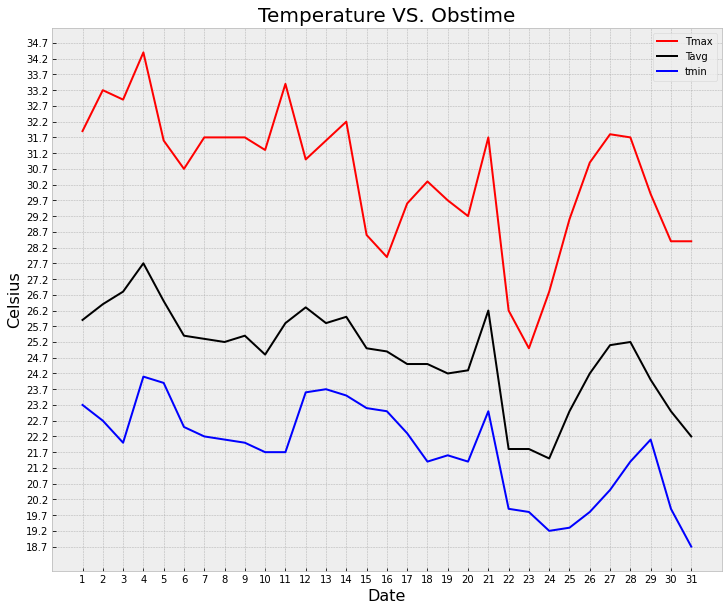

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.style.use('bmh')
plt.figure(figsize=(12,10))
plt.title('Temperature VS. Obstime',fontsize=20) 
plt.ylabel('Celsius',fontsize=16)
plt.xlabel('Date',fontsize=16)
dataticks = np.arange(1, len(xd)+1, 1)
Temperatureticks = np.arange(min(ytmin),max(ytmax)+1,0.5)
plt.xticks(dataticks)
plt.yticks(Temperatureticks)
plt.plot(xd,ytmax,'r',label='Tmax')
plt.plot(xd,ytavg,'k',label='Tavg')
plt.plot(xd,ytmin,'b',label='tmin')
plt.legend()
plt.show()
plt.savefig('Temperature.png')

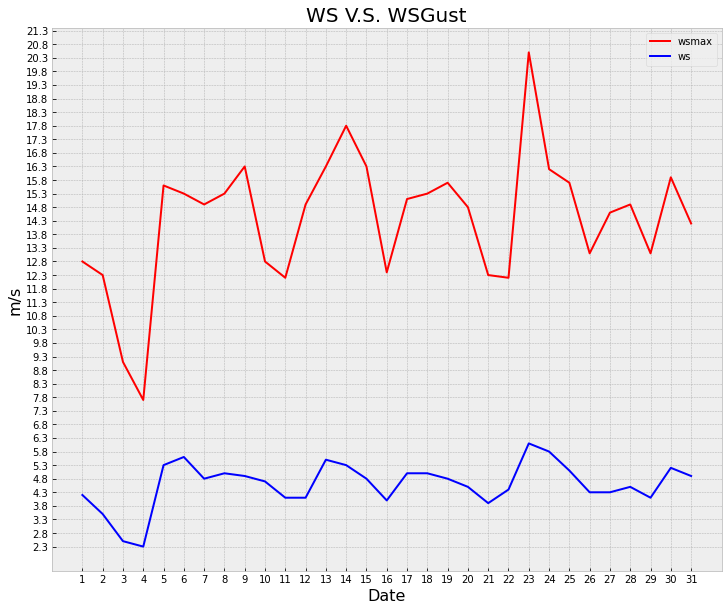

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.style.use('bmh')
plt.figure(figsize=(12,10))
plt.title('WS V.S. WSGust',fontsize=20) 
plt.ylabel('m/s',fontsize=16)
plt.xlabel('Date',fontsize=16)
dataticks = np.arange(1, len(xd)+1, 1)
Windticks = np.arange(min(yws),max(ywsmax)+1,0.5)
plt.xticks(dataticks)
plt.yticks(Windticks)
plt.plot(xd,ywsmax,'r',label='wsmax')
plt.plot(xd,yws,'b',label='ws')
plt.legend()
plt.show()
plt.savefig('Wind.png')

<BarContainer object of 31 artists>

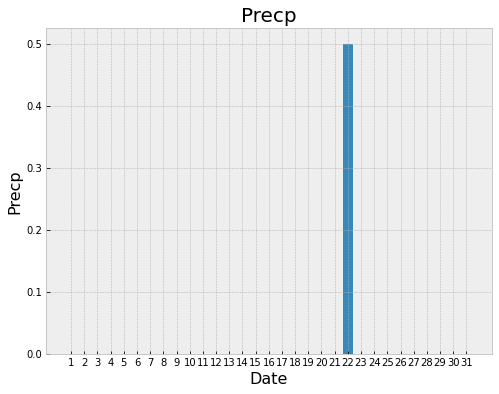

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Precp',fontsize=20)
plt.ylabel('Precp',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.xticks(xd)
plt.bar(xd,yprecp)

# 將資料存入資料庫

In [ ]:
df.to_csv('weather.csv')
conn=sqlite3.connect('weatherdata.db')
df.to_sql('202010月份資訊', conn, if_exists='replace')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,
